In [164]:
from sympy import * 
import numpy as np
from matplotlib import pyplot as plt


In [165]:
def pseudoInverse(X): 
    return np.linalg.inv(X.T @ X) @ X.T

# Første emne - Regression

## Training 

In [166]:
def basis(M, x): 
    return (x.reshape(-1, 1)) ** M

In [167]:
x = np.array([0.5, 2.5, 4.5])
t = np.array([0.4, 0.9, 0.25]) 
M = 3 

Phi = lambda x, M: np.hstack([basis(j, x) for j in range(0,M)])
Phix = Phi(x, M)
w = np.dot(np.linalg.inv(Phix.T @ Phix) @ Phix.T, t) 
pprint(f"{w=}")
Phi


Phix


w=array([ 0.0953125,  0.68125  , -0.14375  ])


array([[ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  4.5 , 20.25]])

## Testing

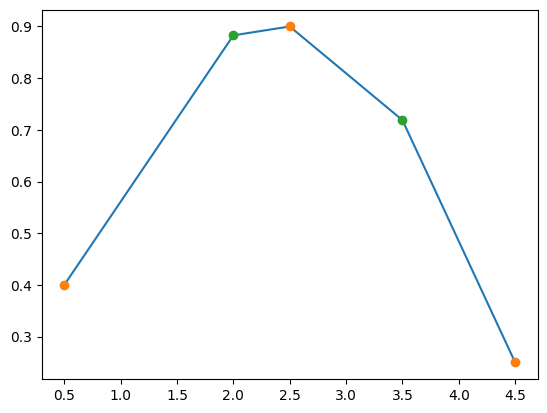

In [168]:
xpunkter = np.array([0.5, 2, 2.5, 3.5, 4.5])

phipredicted = Phi(xpunkter, M)

y = np.dot(w.T, phipredicted.T) # Phi in R^MxN,  R^1xM . R^MxN -> R^1xN 
fig, ax = plt.subplots()
ax.plot(xpunkter, y)
ax.plot([0.5, 2.5, 4.5], t, "o")
ax.plot([2, 3.5], [y[1],y[3]], "o")


# Emne 2 - Klassifikation

# Linear regression for w
Using the polynomial basis function of M = 2 to find the w that has the least errors

In [169]:
def proj(b, a): 
    """
    Projektion af b på a. 
    """
    skalar = (np.dot(a, b))/np.dot(a, a)
    return skalar * a 

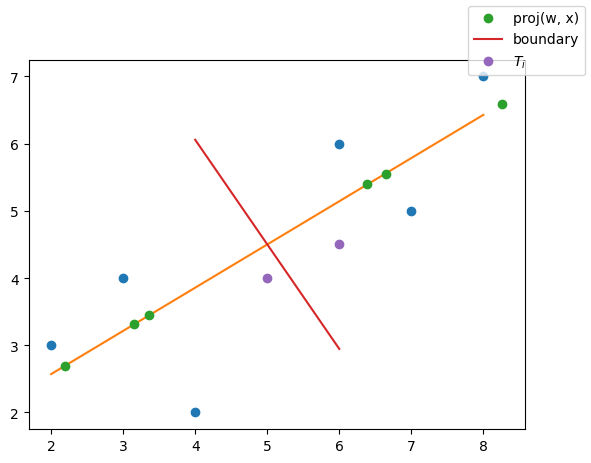

In [170]:
X = np.array([[2, 3],
              [3, 4],
              [4, 2], 
              [6, 6], 
              [7, 5], 
              [8, 7]], dtype= float) 
x = X[:, 0]
t = X[:, 1]
Phix = Phi(x, 2)
w = pseudoInverse(Phix) @ t
y = np.dot(w, Phix.T)                      # Projection vector.
fig, ax = plt.subplots()
ax.plot(*X.T, "o")
ax.plot(x, y)

# Direction vector
wvec = np.array([x[-1] - x[0], y[-1] - y[0]])
# Centering of data points.
Xcenter = X; x0 = 2; y0 = y[0] 
Xcenter[:] -= np.array([x0, y0])
# X projected onto the vector.
y = np.array([proj(xn, wvec) for xn in Xcenter])
y[:] += np.array([x0, y0])
ax.plot(y[:, 0], y[:, 1], "o", label = "proj(w, x)")


# Putting elements into a one dimensional vector.
y[:] -= np.array([x0, y0])
t = (y * np.array([1/6, 1/3.857]))[:, 0]
t0 = np.sum(t) / 6 
x = np.linspace(4, 6, 2)
bound = -1.5556*x + 12.28
ax.plot(x, bound, label ="boundary")
T = np.array([[5,   4],
              [6, 4.5]])
ax.plot(T[:, 0], T[:, 1], "o", label ="$T_i$")
fig.legend()


## Statistisk metode

In [174]:
m1 = np.array([3, 3]); m2 = np.array([7,6])
T = np.array([[5,   4],
              [6, 4.5]])
# Beregning af scatter matrix
Sw = [np.dot(xn - m1, xn - m1) for xn in x]
Sw
Sb = [np.dot(m1 - (m1 + m2)*1/2, m1 - (m1 + m2)*1/2), 
      np.dot(m2 - (m1 + m2)*1/2, m2 - (m1 + m2)*1/2)]
Sw = np.diag(Sw)
Sb = np.fliplr(np.diag(Sb))
ST = Sw + Sb
ST
w = np.dot(np.linalg.inv(Sw), m2 - m1).reshape(-1, 1)

y = np.array([np.dot(w.T, xn) for xn in X])
y0 = (max(y) - min(y))/2
y0

C = [np.dot(w.T, xtest) for xtest in T] - y0
C


[np.float64(2.0), np.float64(18.0)]